In [0]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, classification_report, roc_curve, precision_recall_curve
from sklearn import preprocessing, metrics

def readFile(fileName):
    return open(fileName, 'rb')

def getContent(file, qnt):
    mat = []
    for i in range(qnt):
        try:
            mat.append(np.asarray(np.load(file)))
        except:
            break
    
    return np.asarray(mat)

def readHDF5(fileName):
    return h5py.File(fileName, 'r')

def getHDF5(file, name, qnt):
    dset = file[name]
    return dset[0:qnt]

def genRocCurve(matY, qntTest, yScore):
    fpr, tpr, threshold = roc_curve(matY[0:qntTest], yScore)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
def genPRCurve(matY, qntTest, yScore):    
    precision, recall, _ = precision_recall_curve(matY[0:qntTest], yScore)
    plt.plot(recall, precision, lw=2, color='black') 
    plt.xlim([0.02, 0.99])
    plt.ylim([0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.rcParams['axes.facecolor']='white'
    plt.show()

dsetTrain = readHDF5('datatrain.hdf5')
dsetTest = readHDF5('datatest.hdf5')

min_max_scaler = preprocessing.MinMaxScaler()

MatY ready!
- LBP
Train matrix ready!
Test matrix ready!
SVM Fit - RBF
Score: 55.30%
Results on the Test set:
             precision    recall  f1-score   support

          0       0.56      0.52      0.54       500
          1       0.55      0.58      0.57       500

avg / total       0.55      0.55      0.55      1000



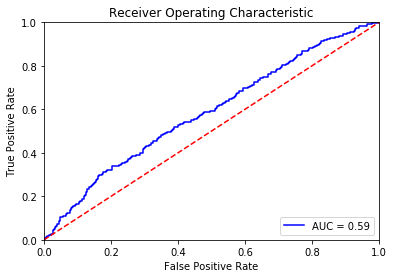

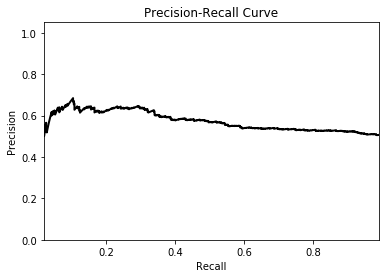

SVM Fit - Poly
Score: 55.30%
Results on the Test set:
             precision    recall  f1-score   support

          0       0.55      0.57      0.56       500
          1       0.56      0.53      0.54       500

avg / total       0.55      0.55      0.55      1000



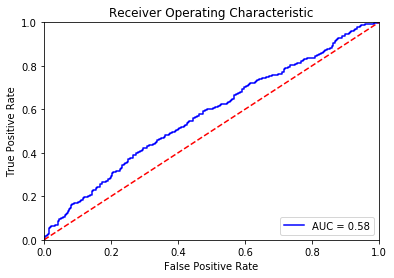

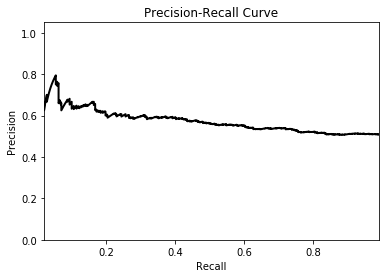

SVM Fit - Linear
Score: 55.50%
Results on the Test set:
             precision    recall  f1-score   support

          0       0.55      0.57      0.56       500
          1       0.56      0.54      0.55       500

avg / total       0.56      0.56      0.55      1000



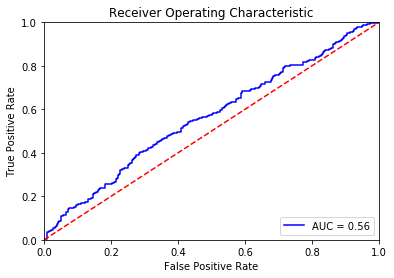

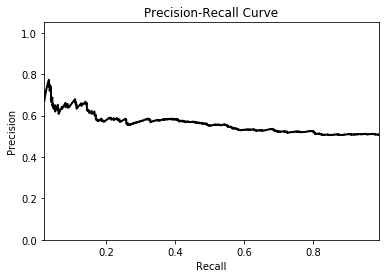

- GLCM
Train matrix ready!
Test matrix ready!
SVM Fit - RBF
Score: 60.10%
Results on the Test set:
             precision    recall  f1-score   support

          0       0.70      0.35      0.47       500
          1       0.57      0.85      0.68       500

avg / total       0.63      0.60      0.57      1000



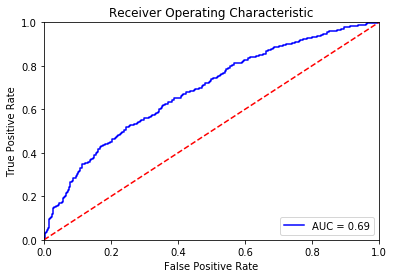

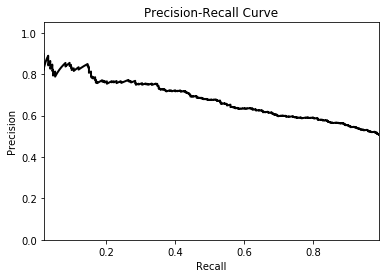

SVM Fit - Poly
Score: 60.30%
Results on the Test set:
             precision    recall  f1-score   support

          0       0.60      0.61      0.61       500
          1       0.60      0.59      0.60       500

avg / total       0.60      0.60      0.60      1000



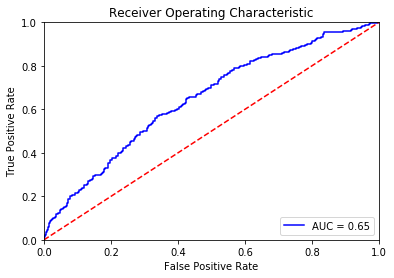

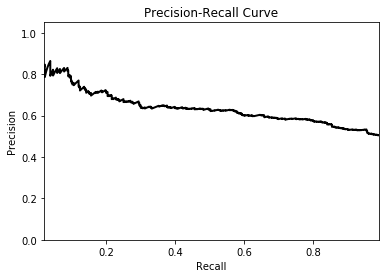

SVM Fit - Linear
Score: 58.00%
Results on the Test set:
             precision    recall  f1-score   support

          0       0.58      0.58      0.58       500
          1       0.58      0.58      0.58       500

avg / total       0.58      0.58      0.58      1000



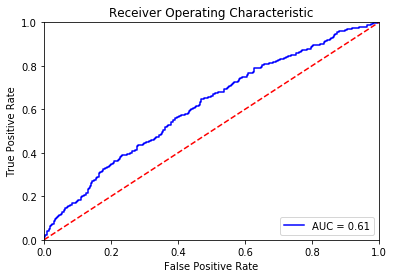

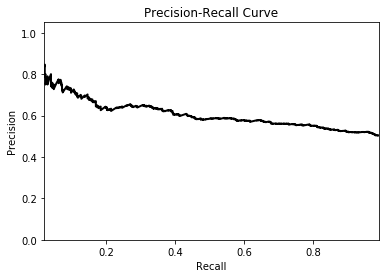

- Sobel
Train matrix ready!
Test matrix ready!
SVM Fit - RBF
Score: 62.50%
Results on the Test set:
             precision    recall  f1-score   support

          0       0.63      0.60      0.62       500
          1       0.62      0.65      0.63       500

avg / total       0.63      0.62      0.62      1000



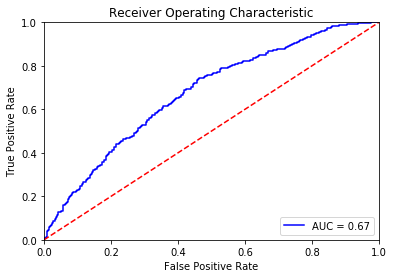

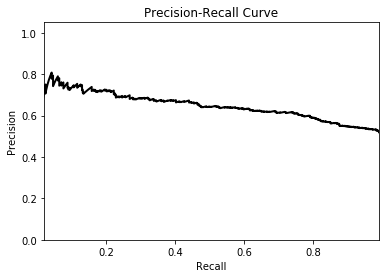

SVM Fit - Poly
Score: 62.50%
Results on the Test set:
             precision    recall  f1-score   support

          0       0.62      0.67      0.64       500
          1       0.64      0.58      0.61       500

avg / total       0.63      0.62      0.62      1000



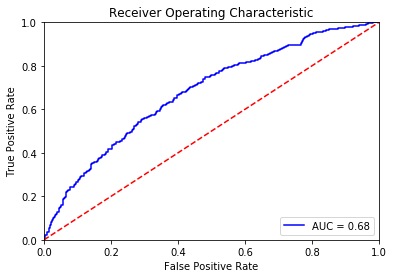

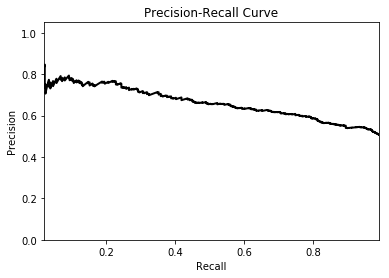

SVM Fit - Linear
Score: 60.20%
Results on the Test set:
             precision    recall  f1-score   support

          0       0.60      0.62      0.61       500
          1       0.61      0.58      0.59       500

avg / total       0.60      0.60      0.60      1000



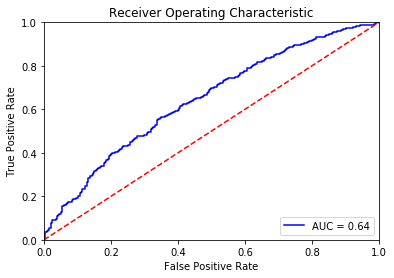

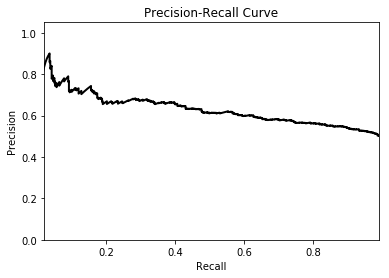

In [0]:
matY     = []
petName  = ['cat', 'dog']
qnt      = 1000
qntTest  = 1000
types    = ['LBP', 'GLCM', 'Sobel']

for i in range(0, 500):
    for pet in petName:
        if (pet == 'dog'):
            matY.append(1)
        else:
            matY.append(0) 
print('MatY ready!')

for type in types:
    print('- ' + type)
    
    matXTrain = getHDF5(dsetTrain, 'data' + type, qnt)
    matXTrain = min_max_scaler.fit_transform(matXTrain)
    print('Train matrix ready!')

    matXTest = getHDF5(dsetTest, 'data' + type, qntTest)
    matXTest = min_max_scaler.fit_transform(matXTest)
    print('Test matrix ready!')
    
    svm = SVC(kernel='rbf', degree=3, gamma='auto', C=1.0, cache_size=1500, coef0=0)
    svm = svm.fit(matXTrain, matY)
    print('SVM Fit - RBF')
    predict = svm.predict(matXTest)
    print('Score: ' + '%0.2f%%' % (accuracy_score(matY[0:qntTest], predict, sample_weight=None)*100))
    print('Results on the Test set:')
    print(classification_report(matY[0:qntTest], predict))
    yScore = svm.decision_function(matXTest)
    genRocCurve(matY, qntTest, yScore)
    genPRCurve(matY, qntTest, yScore)
    
    svm = SVC(kernel='poly', degree=3, gamma=1, C=1.0, cache_size=1500, coef0=3)
    svm = svm.fit(matXTrain, matY)
    print('SVM Fit - Poly')
    predict = svm.predict(matXTest)
    print('Score: ' + '%0.2f%%' % (accuracy_score(matY[0:qntTest], predict, sample_weight=None)*100))
    print('Results on the Test set:')
    print(classification_report(matY[0:qntTest], predict))
    yScore = svm.decision_function(matXTest)
    genRocCurve(matY, qntTest, yScore)
    genPRCurve(matY, qntTest, yScore)
    
    svm = SVC(kernel='linear', degree=3, gamma=1, C=1.0, cache_size=1500, coef0=3)
    svm = svm.fit(matXTrain, matY)
    print('SVM Fit - Linear')
    predict = svm.predict(matXTest)
    print('Score: ' + '%0.2f%%' % (accuracy_score(matY[0:qntTest], predict, sample_weight=None)*100))
    print('Results on the Test set:')
    print(classification_report(matY[0:qntTest], predict))
    yScore = svm.decision_function(matXTest)
    genRocCurve(matY, qntTest, yScore)
    genPRCurve(matY, qntTest, yScore)